Copyright 2022 Andrew M. Olney and made available under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0) for text and [Apache-2.0](http://www.apache.org/licenses/LICENSE-2.0) for code.

# Data Science and the Nature of Data 

This notebook introduces some foundational concepts on types of data and how data can be "messed up."
<!-- in data science.
As a result, this notebook will have more reading and less practical exercises than normal.
But don't worry, we'll have some practical exercises at the end.

We have organized this notebook around **big ideas** in data science.
You may wish to refer to this notebook throughout the course when these ideas come up.
It's OK if you don't completely understand them today.
Some of these ideas are quite subtle and take time to master.

Let's get started! -->

## Types of variables

<!-- We've talked about structured vs. unstructured data already, but we haven't gone into detail about how structured data is created. -->
Structured data begins with **measurements** of some type of thing in the real world, which we call a **variable**.
Let's use the example of height. 
I may measure 10 people and find that their heights in centimeters are:

| Height |
|--------|
| 165    |
| 188    |
| 153    |
| 164    |
| 150    |
| 190    |
| 169    |
| 163    |
| 165    |
| 190    |

Each of these values (e.g. 165) is a measurement of the variable *height*.
We call *height* a variable because its value isn't constant.
If everyone in the world were the same height, we wouldn't call height a variable, and we also wouldn't bother measuring it, because we'd know everyone is the same.

Variables have different **types** that affect your analysis.
If you don't understand these types, you will probably use the wrong analysis!

### Nominal

A nominal variable consists of unordered categories, like *male* or *female* for biological sex.
Notice that these categories are not numbers, and there is no order to the categories.
We do not say that male comes before female or is smaller than female.

### Ordinal

Ordinal variables consist of ordered categories.
You can think of it as nominal data but with an ordering from first to last or smallest to largest.
A common example of ordinal data are Likert questions like:

```
(1) Strongly disagree
(2) Disagree
(3) Neither agree nor disagree
(4) Agree
(5) Strongly agree
```

Even though these options are numbered 1 to 5, those numbers only indicate which comes before the others, not how "big" an option is.
For example, we wouldn't say that the difference between *Agree*  and *Disagree* is the same as the difference between *Neither agree nor disagree* and *Strongly agree*.

### Interval

Interval variables are ordered *and* their measurement scales are evenly spaced.
A classic example is temperature in Fahrenheit.
In degrees Fahrenheit, the difference between 70 and 71 is the same as the difference between 90 and 91 - either case is one degree.
The other most important characteristic of interval variables is also the most confusing one, which is that interval variables don't have a meaningful zero value.
Degrees Fahrenheit is an example of this because there's nothing special about 0 degrees. 
0 degrees doesn't mean there's no temperature or no heat energy, it's just an arbitrary point on the scale.

### Ratio

Ratio variables are like interval variables but with meaningful zeros.
Age and height are good examples because 0 age means you have no age, and 0 height means you have no height.
The name *ratio* reflects that you can form a ratio with these variables, which means that you can say age 20 is twice as old as age 10.
Notice you can't say that about degrees Fahrenheit: 100 degrees is not really twice as hot as 50 degrees, because 0 degrees Fahrenheit doesn't mean "no temperature."

### Why it matters

The type of variable matters because it affects what you can do with it:

- Nominal: you can count frequency
- Ordinal: you can also calculate percentiles and median
- Interval: you can also calculate mean and standard deviation, add/subtract values 
- Ratio: you can multiply/divide values

## Variables in Pandas

We've talked about variables like a statistician or scientist, but `pandas` doesn't exactly match this.

Let's load up some data and take a look. First, import `pandas`:

- `import pandas as pd`

In [4]:
import pandas as pd

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="i!#]:2XI=^qLb$e.|iwo">pd</variable></variables><block type="importAs" id="*]+[97*lfc0xBExPyl{#" x="160" y="229"><field name="libraryName">pandas</field><field name="VAR" id="i!#]:2XI=^qLb$e.|iwo">pd</field></block></xml>

We will use the `mpg` dataset, which contains measurements of fuel economy and other properties of cars from the 1970s.


| Variable     |     | Description                              |
|:--------------|:----------|:------------------------------------------|
| mpg          |     | Miles per gallon; fuel economy           |
| cylinders    |   | Number of cylinders in engine            |
| displacement |     | Volume inside cylinders (likely inches)                  |
| horsepower   |     | Unit of power                            |
| weight       |    | Weight of car (likely pounds)                           |
| acceleration |     | Acceleration of car (likely in seconds to 60 MPH) |
| model_year   |  | Year of car manufacture; last two digits |
| origin       |   | Numeric code corresponding to continent  |
| name     |   | Car model name (ID)                      |

<div style="text-align:center;font-size: smaller">
    <b>Source:</b> This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.
</div>
<br>

Two of these are nominal, one ordinal, one interval, and the rest are ratio. Can you guess which is which?

Now load the data and display it:

- Set `dataframe` to with `pd` do `read_csv`
    - using `"datasets/mpg.csv"`
- `dataframe`

In [7]:
dataframe = pd.read_csv('datasets/mpg.csv')

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="t[n^Fcp7,s93E17ZZ9J6">dataframe</variable><variable id="i!#]:2XI=^qLb$e.|iwo">pd</variable></variables><block type="variables_set" id="3v`CGfKaBAQlZxNrLh;g" x="93" y="206"><field name="VAR" id="t[n^Fcp7,s93E17ZZ9J6">dataframe</field><value name="VALUE"><block type="varDoMethod" id="_t%9/`1H3Fc{hR:y|JKO"><mutation items="1"></mutation><field name="VAR" id="i!#]:2XI=^qLb$e.|iwo">pd</field><field name="MEMBER">read_csv</field><data>pd:read_csv</data><value name="ADD0"><block type="text" id="Ac(8:^_P3%XN~/eCvim3"><field name="TEXT">datasets/mpg.csv</field></block></value></block></value></block><block type="variables_get" id="#KxUvi=Dm$}ah[(R}s(A" x="98" y="286"><field name="VAR" id="t[n^Fcp7,s93E17ZZ9J6">dataframe</field></block></xml>

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


Take a look at the values for each variable above.
Did you update your guess about the type of each variable?

Now let's look at what `pandas` thinks of our variables.
We can do this using `dtypes`:

- from `dataframe` get `dtypes`

In [10]:
dataframe.dtypes

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="t[n^Fcp7,s93E17ZZ9J6">dataframe</variable></variables><block type="varGetProperty" id="*m4iZt~kz-D!Y:i^#V+T" x="8" y="142"><field name="VAR" id="t[n^Fcp7,s93E17ZZ9J6">dataframe</field><field name="MEMBER">dtypes</field><data>dataframe:dtypes</data></block></xml>

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin            int64
name             object
dtype: object

This should look pretty strange to you unless you've taken a programming class.

Instead of thinking about variables *statistically*, `pandas` thinks about them in terms of *programming*.
In other words, **we have to keep track of variable types ourselves, because pandas won't do it for us.**

In fact, `pandas` will happily give us garbage answers because of this.
Check out `describe`:

- with `dataframe` do `describe` 
    - using freestyle `include='all'`

*Note: describe ignores non-numeric variables by default, but we can get them with `include='all'`*

In [14]:
dataframe.describe(include='all')

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="t[n^Fcp7,s93E17ZZ9J6">dataframe</variable></variables><block type="varDoMethod" id="PgC]TrEuai$*N/:Fl@hq" x="8" y="176"><mutation items="1"></mutation><field name="VAR" id="t[n^Fcp7,s93E17ZZ9J6">dataframe</field><field name="MEMBER">describe</field><data>dataframe:describe</data><value name="ADD0"><block type="dummyOutputCodeBlock" id="gCh37Jr:x/}|2.Jh~0J1"><field name="CODE">include='all'</field></block></value></block></xml>

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000,NaN


The rows unique, top, and freq only apply to non-numeric variables, and the other rows don't apply to non-numeric variables.
We see NaN when a row doesn't apply to a variable.

What did `pandas` do right here?

- All ratio variables
- `name`, one of the nominal variables
- `model_year`, the interval variable (only because we did not multiply/divide)

However it did not do the ordinal or other nominal correctly, because in both cases it calculated averages, etc, which don't make sense:

- `origin` 1, 2, 3 are country codes (nominal). How can we have a 1.57 mean country code?
- `cylinders` 4, 6, 8 is ordinal. How can we have a 5.45 mean cylinders?

**Why does pandas get it right sometimes and not others?**

Basically, `pandas` treats every number as ratio and everything non-numeric as nominal.

**So you need to be extra careful when:**

- You use numeric values with a variable that is not ratio
- Anytime you use an ordinal variable

## Measurement

We previously said that structured data begins with measurement of a variable, but we haven't explained what measurement really is.
Measurement is, quite simply, the assignment of a value to a variable.
In the context of a categorical variable like biological sex, we would say the assignment of *male* or *female* is a measurement.
Similarly for height, we would say that 180 cm is a measurement.
Notice that in these two examples, the measurement depends closely on type of variable (e.g. nominal or ratio).

How we measure is tightly connected to how we've defined the variable.
This makes sense, because our measurements serve as a way of defining the variable.
For some variables, this is more obvious than for other variables.
For example, we all know what *length* is. 
It is a measure of distance that we can see with our eyes, and we can measure it in different units like centimeters or inches.
However, some variables are not as obvious, like *justice*.
How do we measure *justice*?
One way would be to ask people, e.g. to ask them how just or unjust they thought a situation was.
There are two problems with this approach.
First, different people will tell you different things.
Second, you may not really be measuring *justice* when you ask this question; you could end up measuring something else by accident, like people's religious beliefs.

When we talk about measurement, especially of things we can't directly observe, there are two important properties of measurement that we want, **validity** and **reliability**.
The picture below presents a conceptual illustration of these ideas using a target.

<!-- Attribution: © Nevit Dilmen -->
<!-- https://commons.wikimedia.org/wiki/File:Reliability_and_validity.svg -->
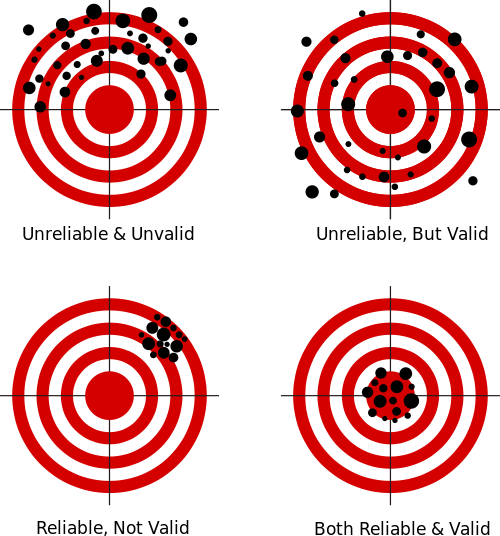

Simply stated, **validity means we are measuring what we intend to measure**.
In the images, validity is being "on target," so that our measurements are *centered* on what we are trying to measure.

In contrast, **reliability means our measurements are consistent**. 
Our measurements could be consistently wrong, which would make them reliable but not valid (lower left).
Ideally, our measurements will be both valid and reliable (lower right).

When it comes to validity and reliability, the most important thing to understand is that **validity is not optional.**
If you don't have validity, your variable is wrong - you're not measuring what you think you're measuring.
Reliability is optional to a certain extent, but if the reliability is very low, we won't be able to get much information out of the variable.

### Dirty data 

If data is clean, then we don't need to correct it or process it to remove garbage values or correct noisy values.
You might expect all data to be clean. 
However, even carefully collected data can have problems that require correction before it can be used properly.
Dirty data is the norm for unplanned data collection, so sorry days is common in data science.

There are many ways that data can be dirty, but to make the idea more concrete, let's consider a few examples.
Imagine that you are interested in the weather in your backyard, so you put out a battery operated thermometer that records the temperature every hour.
You then leave it there for a month.
Now imagine that it worked fine for the first two weeks, but since you didn't change the batteries, the measurements for the last two weeks become increasingly unreliable, e.g. reporting up to 10 degrees above or below the actual temperature, until it finally shuts off leaving you with no data for the remaining days.
This kind of problem, an **instrument failure** leading to **unreliable measurement**, is actually quite common and can take a lot of planning to avoid.
<!-- Another example of dirty data is at the recording stage. 
Imagine a computer is recording audio data by writing it to the hard disk.
If the computer suddenly becomes active with another task (say streaming a video or installing an operating system update) the audio data may "glitch". -->

While *very* dirty data is usually obvious, it can sometimes be hard to recognize. 
For this reason, it is important to check your data for problems (e.g. crazy values, like a person being 1 ft tall or 200 years old) and think very seriously about how problems should be corrected.
Data cleaning is such a tricky topic that we will delay it until much later in the course - for now we'll just focus on finding problems.

Let's look at a case study with some fake data.
The scenario is pregnant women in the hospital being assessed for pain, where pain level would determine what pain relief they receive.
Here are the variables:

| Variable       | Description                                       |
|----------------|---------------------------------------------------|
| Age            | Patient age in years                              |
| Dr-1           | Doctor 1 assessment of pain: high, mid, low       |
| Dr-2           | Doctor 2 assessment of pain: high, mid, low       |
| Blood-Pressure | Systolic blood pressure in millimeters of mercury |

What types of variables do you think these are?

How can we tell if the data are dirty?

One of the best ways is to `describe` the data and thing about what plots might reveal.
Let's list the data and describe it:

- Set `dataframe` to with `pd` do `read_csv`
    - using `"datasets/pregnancy-pain.csv"`
- with `dataframe` do `describe`
    - using freestyle `include='all'`

In [16]:
dataframe = pd.read_csv('datasets/pregnancy-pain.csv')

dataframe.describe(include='all')

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="t[n^Fcp7,s93E17ZZ9J6">dataframe</variable><variable id="i!#]:2XI=^qLb$e.|iwo">pd</variable></variables><block type="variables_set" id="v@Jo,]2z8SmCnZf3/D/(" x="60" y="239"><field name="VAR" id="t[n^Fcp7,s93E17ZZ9J6">dataframe</field><value name="VALUE"><block type="varDoMethod" id="v1Nu+gNq`fxs`ues1BV;"><mutation items="1"></mutation><field name="VAR" id="i!#]:2XI=^qLb$e.|iwo">pd</field><field name="MEMBER">read_csv</field><data>pd:read_csv</data><value name="ADD0"><block type="text" id="1K`dGq(Kx0J{7~=8sCdP"><field name="TEXT">datasets/pregnancy-pain.csv</field></block></value></block></value></block><block type="varDoMethod" id="JDN*WE{,3j.%5V6VS5m+" x="82" y="350"><mutation items="1"></mutation><field name="VAR" id="t[n^Fcp7,s93E17ZZ9J6">dataframe</field><field name="MEMBER">describe</field><data>dataframe:describe</data><value name="ADD0"><block type="dummyOutputCodeBlock" id="w8?.~kydD1)]nA$d?iC["><field name="CODE">include='all'</field></block></value></block></xml>

,Age,Dr-1,Dr-2,Blood-Pressure
count,1013.000000,1014,1014,1014.000000
unique,NaN,4,3,NaN
top,NaN,low,low,NaN
freq,NaN,406,407,NaN
mean,29.892399,NaN,NaN,132.433925
std,13.614007,NaN,NaN,16.489402
min,4.000000,NaN,NaN,110.000000
25%,19.000000,NaN,NaN,116.000000
50%,26.000000,NaN,NaN,132.000000
75%,39.000000,NaN,NaN,150.000000


Here are some things to note.
Take a moment to think about the possible cause of the problem:

- Count of `age` is one less than the other variables 
<details><summary>Hint</summary><mark>A value is missing for age</mark></details>
- Dr-1 has 4 unique values, one more than Dr-2
<details><summary>Hint</summary><mark>One of the entries is misspelled</mark></details>
- The frequency of the top value for the doctors,  `low`, is almost the same
<details><summary>Hint</summary><mark>The doctors either agree a lot, or the variable is the same</mark></details>
- The min `age` is 4 and max is 91
<details><summary>Hint</summary><mark>Since pregnant women aren't that young or old, these must be data entry errors</mark></details>

**If you know how to read the describe table, you can make pretty good guesses about problems.**

Here's how to confirm our guesses with code.

### Missing values

First, get whether values are missing:

- Set `missing` to with `dataframe` do `isnull`

In [18]:
missing = dataframe.isnull()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Y[%k.R#:6/St%z5mke*3">missing</variable><variable id="t[n^Fcp7,s93E17ZZ9J6">dataframe</variable></variables><block type="variables_set" id="[cvG~Q`fmxO{{q)1VM4?" x="4" y="183"><field name="VAR" id="Y[%k.R#:6/St%z5mke*3">missing</field><value name="VALUE"><block type="varDoMethod" id="#coK8HQ6wgNvZ5{1HL){"><mutation items="1"></mutation><field name="VAR" id="t[n^Fcp7,s93E17ZZ9J6">dataframe</field><field name="MEMBER">isnull</field><data>dataframe:isnull</data></block></value></block></xml>

Now sum the missing values in each column:

- with `missing` do `sum`

In [20]:
missing.sum()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Y[%k.R#:6/St%z5mke*3">missing</variable></variables><block type="varDoMethod" id="r*8K.}/8#$[x*@V/qN:g" x="8" y="176"><mutation items="1"></mutation><field name="VAR" id="Y[%k.R#:6/St%z5mke*3">missing</field><field name="MEMBER">sum</field><data>missing:sum</data></block></xml>

Age               1
Dr-1              0
Dr-2              0
Blood-Pressure    0
dtype: int64

### Extra values

First, get the column you want to check:

- Set `dr1` to `dataframe[` `"Dr-1"` `]`

In [22]:
dr1 = dataframe['Dr-1']

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="aUTgCRF6(F_|ie!(!exN">dr1</variable><variable id="t[n^Fcp7,s93E17ZZ9J6">dataframe</variable></variables><block type="variables_set" id="egQSB$%{GFk|}me18P|2" x="43" y="111"><field name="VAR" id="aUTgCRF6(F_|ie!(!exN">dr1</field><value name="VALUE"><block type="indexer" id="Dbka$JDA,nFAp|kiO@Ld"><field name="VAR" id="t[n^Fcp7,s93E17ZZ9J6">dataframe</field><value name="INDEX"><block type="text" id="d6|Y|4N8Ai[C#mAxGHH;"><field name="TEXT">Dr-1</field></block></value></block></value></block></xml>

Now get the unique values in that column:

- `with dr1 do unique`

In [25]:
dr1.unique()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="aUTgCRF6(F_|ie!(!exN">dr1</variable></variables><block type="varDoMethod" id="1WVS^M{Q6B04+R4eW@kZ" x="8" y="176"><mutation items="1"></mutation><field name="VAR" id="aUTgCRF6(F_|ie!(!exN">dr1</field><field name="MEMBER">unique</field><data>dr1:unique</data></block></xml>

array(['high', 'low', 'mid', 'medium'], dtype=object)

As you can see, we have an extra value, 'medium'. This looks like a data entry error where someone should have used 'mid'.

### Duplicate variables

We think the two doctors might be the same, but if you look at the data, they don't match exactly on each row.

For a problem like this, we can compare the distributions.
If they match, we could have a duplicate variable.

Start by getting the distribution for dr1:

- `with dr1 do value_counts`

In [28]:
dr1.value_counts()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="aUTgCRF6(F_|ie!(!exN">dr1</variable></variables><block type="varDoMethod" id="FPi518`a/Z$wu`S`yb7p" x="200" y="315"><mutation items="1"></mutation><field name="VAR" id="aUTgCRF6(F_|ie!(!exN">dr1</field><field name="MEMBER">value_counts</field><data>dr1:value_counts</data></block></xml>

Dr-1
low       406
mid       335
high      272
medium      1
Name: count, dtype: int64

Each row above is the count of a value in that column, e.g.,'low' occurs 406 times.

To get the same for Dr 2, we must first get that column:

- Set `dr2` to `dataframe[` `"Dr-2"` `]`

In [29]:
dr2 = dataframe['Dr-2']

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="yk6+(VgCa|[wkHOf;vgi">dr2</variable><variable id="t[n^Fcp7,s93E17ZZ9J6">dataframe</variable></variables><block type="variables_set" id="jN@/rW]R%36py}xWqx7t" x="30" y="110"><field name="VAR" id="yk6+(VgCa|[wkHOf;vgi">dr2</field><value name="VALUE"><block type="indexer" id="O[YQ?-8mYMC?wAT4g-P5"><field name="VAR" id="t[n^Fcp7,s93E17ZZ9J6">dataframe</field><value name="INDEX"><block type="text" id="Js]y_egVIzA/TI:c[R6e"><field name="TEXT">Dr-2</field></block></value></block></value></block></xml>

Now we can get the Dr 2 distribution:

- with `dr2` do `value_counts`

In [33]:
dr2.value_counts()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="yk6+(VgCa|[wkHOf;vgi">dr2</variable></variables><block type="varDoMethod" id="v:n[qOBvESROb]wBs;c6" x="200" y="315"><mutation items="1"></mutation><field name="VAR" id="yk6+(VgCa|[wkHOf;vgi">dr2</field><field name="MEMBER">value_counts</field><data>dr2:value_counts</data></block></xml>

Dr-2
low     407
mid     335
high    272
Name: count, dtype: int64

The two doctors are different by only one rating over a thousand.
That seems pretty unlikely.

## Check your knowledge

**Hover to see the correct answer.**

1.  What is a variable in the context of structured data?
- A constant value that does not change.
- <div title="Correct Answer">A measurement of some type of thing in the real world whose value isn't constant.</div>
- A type of unstructured data.
- A fixed attribute of an object.

2.  Which of the following describes an ordinal variable?
- Unordered categories.
- A meaningful zero value.
- <div title="Correct Answer">Ordered categories where the difference between categories is not necessarily equal.</div>
- Evenly spaced measurement scales with a meaningful zero.

3.  What is a key characteristic of an interval variable?
- You can multiply and divide values.
- It has a meaningful zero value.
- <div title="Correct Answer">Its measurement scales are evenly spaced, but it doesn't have a meaningful zero value.</div>
- It consists of unordered categories.

4.  According to the notebook, what is the primary reason the type of variable matters in data analysis?
- It dictates the programming language you should use.
- It determines the size of your dataset.
- <div title="Correct Answer">It affects what types of calculations and analyses you can perform on the data.</div>
- It influences how fast your code will run.

5.  When using `pandas`, how does it generally treat numeric and non-numeric variables?
- <div title="Correct Answer">It treats every number as ratio and everything non-numeric as nominal.</div>
- It automatically determines the statistical type (nominal, ordinal, interval, ratio).
- It treats all variables as nominal by default.
- It treats all variables as ratio by default.

6.  In the `mpg` dataset, what does the `name` variable represent?
- Fuel economy in miles per gallon.
- Number of cylinders in the engine.
- <div title="Correct Answer">Car model name (ID).</div>
- Year of car manufacture.

7.  Based on the `dataframe.dtypes` output for the `mpg` dataset, what is the `model_year` variable's `pandas` data type?
- `float64`
- `object`
- <div title="Correct Answer">`int64`</div>
- `datetime`

8.  Why did `pandas` calculate a mean of `1.572864` for the `origin` variable in the `mpg` dataset, and why is this problematic?
- `pandas` correctly identified `origin` as a ratio variable.
- The mean is correct because `origin` values (1, 2, 3) are truly numerical.
- <div title="Correct Answer">`origin` is a nominal variable (country codes), and calculating a mean for nominal data doesn't make logical sense.</div>
- The data contains missing values that skew the mean calculation.

9.  What does **validity** in measurement refer to?
- The consistency of measurements.
- <div title="Correct Answer">Measuring what you intend to measure.</div>
- The ability to reproduce measurements perfectly.
- The absence of any errors in data collection.

10. A thermometer consistently reports temperatures 5 degrees lower than the actual temperature. This measurement is:
- Valid and reliable.
- <div title="Correct Answer">Reliable but not valid.</div>
- Valid but not reliable.
- Neither valid nor reliable.

11. What does the `count` row in the `dataframe.describe(include='all')` output tell us about the `Age` variable in the `pregnancy-pain.csv` dataset?
- The average age of patients.
- The most frequent age.
- <div title="Correct Answer">The number of non-missing values for Age.</div>
- The total number of unique age values.

12. The `dataframe.describe(include='all')` output for `pregnancy-pain.csv` shows that `Dr-1` has 4 unique values, while `Dr-2` has 3. What does this suggest as a likely problem?
- Missing data for `Dr-1`.
- Inconsistent data collection methods for `Dr-2`.
- <div title="Correct Answer">A data entry error or typo in `Dr-1` (e.g., 'medium' instead of 'mid').</div>
- The doctors are using different scales to assess pain.

<!-- #  -->